In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
#from sklearn import datasets
#from sklearn import preprocessing
#from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, initializers
from tensorflow.keras.utils import plot_model

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import (Input, Dense, Dropout, Activation,
                                     BatchNormalization, Flatten,
                                     Conv2D, MaxPooling2D,
                                     GlobalAveragePooling2D)

import os
import cv2

os.environ["CUDA_VISIBLE_DEVICES"] = "0"

# 檢查有沒有 GPU

physical_devices = tf.config.experimental.list_physical_devices('GPU')
print(physical_devices)

assert len(physical_devices) > 0, "Not enough GPU hardware devices available"

tf.config.experimental.set_memory_growth(physical_devices[0], True)

import tensorflow.keras.backend as K
K.clear_session()

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


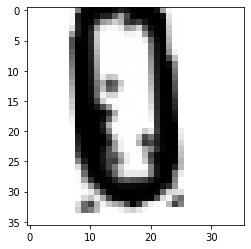

(36, 36)

In [2]:
image = cv2.imread(
    "/home/jovyan/test1/car_aug/0/0001.bmp", 0)
#    "/home/jovyan/at083-group23/car_plate_data/0/0001.bmp", 0)
plt.imshow(image, cmap="gray")
plt.show()
image.shape

In [3]:
image.ndim

2

In [4]:
image.dtype

dtype('uint8')

In [5]:
data_path = "/home/jovyan/test1/car_aug"
#data_path = "/home/jovyan/at083-group23/car_plate_data"

x_data_list = []
y_data_list = []
for roots, dirs, files in os.walk(data_path):
    for each in files:
        if each.find('checkpoint') == -1:
            x_data_list.append(os.path.join(roots, each))
            y_data_list.append(roots.split("/")[-1])

In [6]:
#img_size = 224
img_size = 36

/home/jovyan/test1/car_aug/H/0746.bmp
(36, 36)


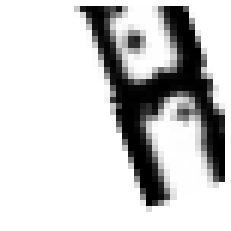

In [7]:
print(x_data_list[0])
img = cv2.imread(x_data_list[0], 0)
img = cv2.resize(img, (img_size, img_size))
print(img.shape)
plt.imshow(img, cmap="gray")
plt.axis('off')
plt.show()

In [8]:
#img = img[..., np.newaxis]
print(img.shape)

(36, 36)


In [9]:
def load_img(data_list):
    data_img = []
    for each in tqdm(data_list):
        img = cv2.imread(each, 0)
        img = cv2.resize(img, (img_size, img_size))
        data_img.append(img[..., np.newaxis])
        #data_img.append(img)

    return np.array(data_img).astype('float32')/255.
#    return np.array(data_img).astype('float32')

In [10]:
x_data = load_img(x_data_list)

100%|██████████| 51795/51795 [00:02<00:00, 24998.20it/s]


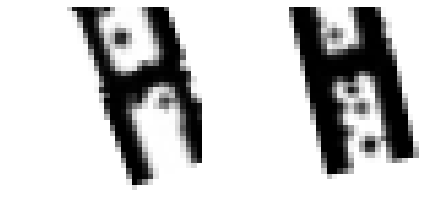

In [11]:
# show image
plt.figure(figsize=(16, 8))
for i in range(2):
    plt.subplot(2, 4, i+1)
    plt.imshow(x_data[i][..., 0], cmap='gray')
    #plt.imshow(x_data[i][:, :, ::-1])
    plt.axis('off')
plt.show()

In [12]:
y_data_list = pd.DataFrame(y_data_list, columns=['label'])
uniques = y_data_list['label'].value_counts().index
counts = y_data_list['label'].value_counts().values
print(uniques)
print('10 + 24 =', uniques.size)

Index(['9', '7', '5', '1', '8', 'A', '3', '2', '0', 'Z', 'L', 'M', 'Y', 'K',
       'Q', 'H', 'G', 'X', 'C', 'P', 'N', 'W', 'V', '4', '6', 'E', 'F', 'T',
       'J', 'B', 'U', 'R', 'D', 'S'],
      dtype='object')
10 + 24 = 34


In [13]:
a = pd.DataFrame(uniques.sort_values(), columns=['label'])
print(a.info())
print(a.head(15))

a.to_csv('/home/jovyan/at083-group23/mapping.txt', float_format=None, 
         columns=['label'], index=True, index_label='idx')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 1 columns):
label    34 non-null object
dtypes: object(1)
memory usage: 400.0+ bytes
None
   label
0      0
1      1
2      2
3      3
4      4
5      5
6      6
7      7
8      8
9      9
10     A
11     B
12     C
13     D
14     E


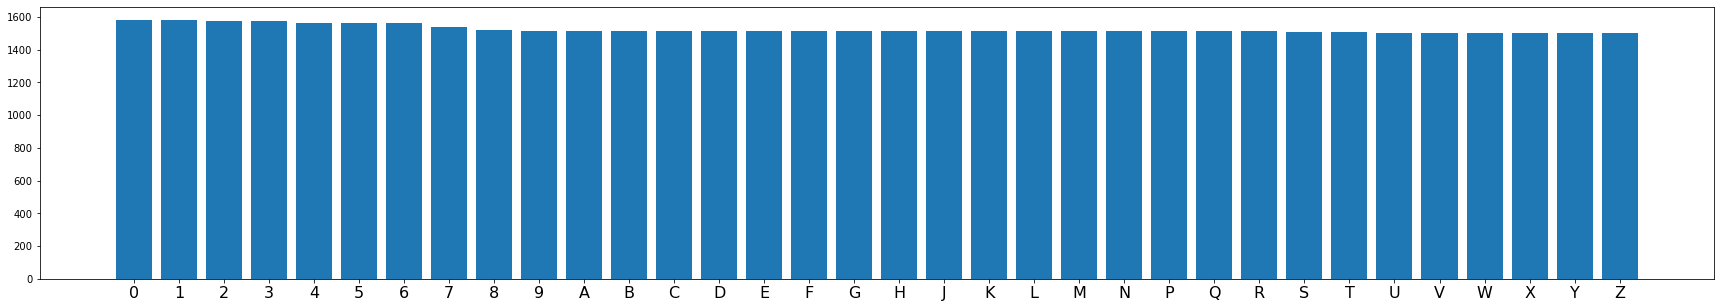

In [14]:
plt.figure(figsize=(30, 5))
plt.bar(uniques.sort_values(), counts)
plt.xticks(fontsize=16)
plt.show()

In [15]:
class_path = "/home/jovyan/at083-group23/"
class_map = pd.read_csv(os.path.join(class_path, 'mapping.txt'),
                        header=0, names=['label', 'idx'], index_col=['idx'], 
                        usecols=None, dtype=None)
print(class_map.info())
print(class_map.head(15))
class_map = class_map.to_dict()['label']

<class 'pandas.core.frame.DataFrame'>
Index: 34 entries, 0 to Z
Data columns (total 1 columns):
label    34 non-null int64
dtypes: int64(1)
memory usage: 544.0+ bytes
None
     label
idx       
0        0
1        1
2        2
3        3
4        4
5        5
6        6
7        7
8        8
9        9
A       10
B       11
C       12
D       13
E       14


In [16]:
class_map

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9,
 'A': 10,
 'B': 11,
 'C': 12,
 'D': 13,
 'E': 14,
 'F': 15,
 'G': 16,
 'H': 17,
 'J': 18,
 'K': 19,
 'L': 20,
 'M': 21,
 'N': 22,
 'P': 23,
 'Q': 24,
 'R': 25,
 'S': 26,
 'T': 27,
 'U': 28,
 'V': 29,
 'W': 30,
 'X': 31,
 'Y': 32,
 'Z': 33}

In [17]:
y_data = y_data_list['label'].map(class_map).values.copy()

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data,
                                                    test_size=0.1,
                                                    random_state=10,
                                                    stratify=y_data)

In [18]:
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

x_train shape: (46615, 36, 36, 1)
x_test shape: (5180, 36, 36, 1)


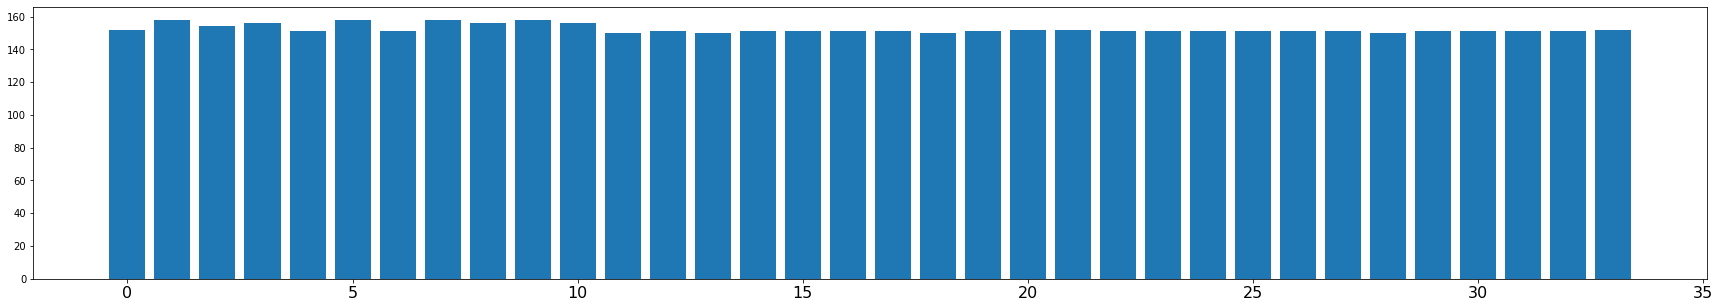

In [19]:
uniques, counts = np.unique(y_test, return_counts=True)
plt.figure(figsize=(30, 5))
plt.bar(uniques, counts)
plt.xticks(fontsize=16)
plt.show()

In [20]:
y_train[0:10]    # 0:10筆的類別

array([ 4, 14,  9,  3, 20, 31, 33, 19, 32, 16])

In [21]:
# 將訓練資料與測試資料的 label，進行 Onehot encoding 轉換
num_classes = len(uniques)

y_train = np.eye(num_classes, dtype='float32')[y_train]
y_test = np.eye(num_classes, dtype='float32')[y_test]

print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

y_train shape: (46615, 34)
y_test shape: (5180, 34)


In [22]:
# 選擇 Keras 的 API 寫法 -- CNN

#initial = initializers.he_normal()
initial = 'glorot_uniform'


inputs = Input(shape=x_train.shape[1:])
#inputs = Input(shape=(img_size, img_size, 1))

# 第一層
# 建立卷積層，設定32個3*3的filters
# 設定ReLU為激活函數。
x = Conv2D(8, (3, 3), padding='same', kernel_initializer=initial)(inputs)
#x = BatchNormalization()(x)
x = Activation('relu')(x)


# 第二層 - 卷積層 + 池化層
x = Conv2D(8, (3, 3), padding='same', kernel_initializer=initial)(x)
#x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
# x = Dropout(0.25)(x)

# 建立分類模型 (MLP) : 平坦層 + 輸出層 (10)
x = Flatten()(x)
#x = GlobalAveragePooling2D()(x)
x = Dense(32, activation='relu')(x)
#x = Dropout(0.25)(x)

outputs = Dense(num_classes, activation='softmax')(x)


cnn_model = Model(inputs=inputs, outputs=outputs)

In [23]:
print(cnn_model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 36, 36, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 36, 36, 8)         80        
_________________________________________________________________
activation (Activation)      (None, 36, 36, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 36, 36, 8)         584       
_________________________________________________________________
activation_1 (Activation)    (None, 36, 36, 8)         0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 18, 18, 8)         0         
_________________________________________________________________
flatten (Flatten)            (None, 2592)              0     

In [24]:
model_dir = 'cnn_model-logs-c'
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

logfiles = model_dir + '/{}-{}'.format('basic_model', cnn_model.__class__.__name__)
model_cbk = keras.callbacks.TensorBoard(log_dir=logfiles,
                                        histogram_freq=1)

modelfiles = model_dir + '/{}-best-model-c.h5'.format('basic_model')
model_mckp = keras.callbacks.ModelCheckpoint(modelfiles,
                                             monitor='val_accuracy',
                                             save_best_only=True)

earlystop = keras.callbacks.EarlyStopping(monitor='val_loss',
                                          patience=5,
                                          verbose=1)


callbacks_list = [model_cbk, model_mckp, earlystop]

In [25]:
# 編譯模型
# 選用 Adam 為 optimizer
learning_rate = 1e-3
optimizer = keras.optimizers.Adam(lr=learning_rate)



cnn_model.compile(loss='categorical_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])

In [26]:

batch_size = 32
epochs = 300

num_step = x_train.shape[0] // batch_size + 1


In [27]:


datagen = ImageDataGenerator(
                             rotation_range=0,
                             width_shift_range=0,
                             height_shift_range=0,
                             brightness_range=None,
                             shear_range=0.0,
                             zoom_range=0.0,
                             channel_shift_range=0.0,
                             fill_mode='nearest',
                             cval=0.0,
                             horizontal_flip=False,
                             vertical_flip=False,
    
                             )



In [49]:

cnn_history = cnn_model.fit_generator(datagen.flow(x_train, y_train,
                                                batch_size=batch_size),
                                        steps_per_epoch=num_step,
                                        epochs=epochs,
                                        validation_data=(x_test, y_test),
                                        verbose=2,
                                        callbacks=callbacks_list)


Epoch 1/300
1457/1457 - 33s - loss: 0.0228 - accuracy: 0.9922 - val_loss: 0.0866 - val_accuracy: 0.9755
Epoch 2/300
1457/1457 - 33s - loss: 0.0210 - accuracy: 0.9932 - val_loss: 0.0978 - val_accuracy: 0.9753
Epoch 3/300
1457/1457 - 33s - loss: 0.0214 - accuracy: 0.9929 - val_loss: 0.0823 - val_accuracy: 0.9795
Epoch 4/300
1457/1457 - 33s - loss: 0.0207 - accuracy: 0.9934 - val_loss: 0.0920 - val_accuracy: 0.9790
Epoch 5/300
1457/1457 - 29s - loss: 0.0192 - accuracy: 0.9934 - val_loss: 0.0847 - val_accuracy: 0.9788
Epoch 6/300
1457/1457 - 28s - loss: 0.0146 - accuracy: 0.9949 - val_loss: 0.0816 - val_accuracy: 0.9793
Epoch 7/300
1457/1457 - 33s - loss: 0.0187 - accuracy: 0.9935 - val_loss: 0.0777 - val_accuracy: 0.9805
Epoch 8/300
1457/1457 - 41s - loss: 0.0152 - accuracy: 0.9949 - val_loss: 0.0812 - val_accuracy: 0.9792
Epoch 9/300
1457/1457 - 42s - loss: 0.0163 - accuracy: 0.9948 - val_loss: 0.0941 - val_accuracy: 0.9790
Epoch 10/300
1457/1457 - 42s - loss: 0.0153 - accuracy: 0.9948 -

In [50]:
best_model = "./cnn_model-logs-c/basic_model-best-model-c.h5"
cnn_model = load_model(best_model)

In [51]:
loss, acc = cnn_model.evaluate(x_test, y_test, verbose=2)

5180/1 - 0s - loss: 0.0423 - accuracy: 0.9853


In [52]:
y_pred = cnn_model.predict(x_test)
print(y_pred[:3])
y_pred = y_pred.argmax(-1)
print(y_pred[:3])

[[2.34975841e-12 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.05239984e-26 0.00000000e+00 3.62391113e-26 0.00000000e+00
  1.16164896e-24 0.00000000e+00 3.27809744e-08 6.23682832e-21
  6.54664832e-35 1.81041744e-11 2.04862248e-36 0.00000000e+00
  1.15997187e-22 4.75562876e-17 0.00000000e+00 5.03182972e-15
  1.50134763e-25 3.27661812e-18 1.00000000e+00 5.50636304e-33
  1.10831309e-10 2.63187663e-15 0.00000000e+00 3.15872040e-27
  2.44348541e-14 2.49861894e-28 7.03372473e-33 3.99929979e-31
  0.00000000e+00 0.00000000e+00]
 [9.74898725e-17 1.43736487e-31 5.22205350e-27 3.17576428e-37
  2.31620764e-23 5.01772233e-30 1.96851640e-23 0.00000000e+00
  9.95809034e-23 1.62146118e-34 2.47614544e-24 0.00000000e+00
  1.00000000e+00 2.30821575e-31 1.65302086e-17 3.15131620e-21
  1.71044031e-15 0.00000000e+00 0.00000000e+00 1.01619288e-31
  2.49722215e-10 0.00000000e+00 0.00000000e+00 1.24472735e-25
  1.87299698e-24 3.96972154e-31 4.49133249e-34 2.65656770e-16
  8.02480825e-24 2.28977661e-35 0.000

In [53]:
print(accuracy_score(y_test.argmax(-1), y_pred))
#print(confusion_matrix(y_test.argmax(-1), y_pred))
confusion_matrix(y_test.argmax(-1), y_pred)

0.9853281853281853


array([[142,   0,   0, ...,   0,   0,   0],
       [  0, 156,   0, ...,   0,   1,   0],
       [  0,   0, 153, ...,   0,   0,   1],
       ...,
       [  0,   0,   0, ..., 148,   2,   0],
       [  0,   0,   0, ...,   0, 151,   0],
       [  0,   0,   4, ...,   0,   0, 148]])

In [54]:
class_names = np.array([each for each in class_map.keys()])

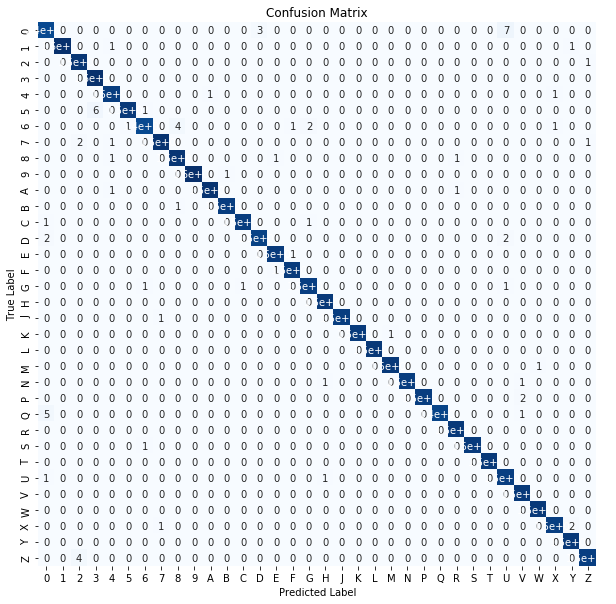

In [55]:
import seaborn as sns

matrix = confusion_matrix(y_test.argmax(-1), y_pred)

plt.figure(figsize=(10, 10))
sns.heatmap(matrix, annot=True, cbar=False, cmap="Blues",
            xticklabels=class_names,
            yticklabels=class_names)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')

# Save figure first to prevent black after show figure.
plt.savefig('./Confusion Matrix-c.png')

plt.show()